In [71]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [72]:
np.random.seed(0)

In [73]:
def datos_sesgados(sesgo, cantidad, maximo):
    aleatorios = stats.skewnorm.rvs(sesgo, loc = 2.5, size=cantidad, random_state = 0)
    aleatorios = aleatorios + abs(aleatorios.min())
    aleatorios = np.round(aleatorios, 2)/aleatorios.max() * maximo
    return np.round(aleatorios, 1)

In [74]:
edades = datos_sesgados(3, 100000, 62)

In [75]:
edades

array([38.8, 33.5, 34.2, ..., 34.3, 38.1, 37.4])

In [76]:
edades.min()

np.float64(19.5)

In [77]:
edades.max()

np.float64(62.0)

In [78]:
#Muestra

tamaño_muestra = 100
muestra =np.random.choice(edades, tamaño_muestra)
muestra

array([31.5, 34.2, 34.4, 31.1, 34.1, 35.7, 32.9, 40. , 29.1, 36.2, 36.4,
       30.3, 37.8, 31.8, 39.9, 29.9, 28.2, 31.1, 39.2, 41. , 26.7, 31.1,
       27.8, 33.7, 28.3, 35.2, 40.4, 30.7, 34. , 29.2, 42.6, 33.3, 36.1,
       29.7, 31.1, 37.3, 35.1, 36.3, 36.5, 39.9, 30. , 39.1, 37.9, 32.3,
       40.2, 34.2, 36.5, 33.6, 29.2, 45.2, 32.4, 41.9, 36.5, 38.1, 30.7,
       32.9, 33. , 32.1, 31.1, 32.6, 33.1, 32.9, 33.9, 25.9, 25.1, 35.5,
       47.5, 42.5, 33.2, 28.7, 29.3, 34.7, 32.8, 41.9, 36.2, 34.7, 32. ,
       43.8, 33.3, 36.1, 37.7, 35.7, 29. , 42. , 43.8, 30.6, 33.3, 34.2,
       37.6, 37.2, 30.3, 30.6, 30.8, 30.8, 31.4, 29.8, 25.8, 35.3, 34.5,
       29. ])

In [79]:
from os import replace
muestras_generadas = np.array([])
num_muestras = 1000
for i in range(num_muestras):
    muestras_generadas = np.append(muestras_generadas, np.random.choice(edades, tamaño_muestra, replace = False))

muestras_generadas = muestras_generadas.reshape(-1,tamaño_muestra )
muestras_generadas

array([[37.8, 28.7, 35.7, ..., 25.5, 27.1, 30.9],
       [26.7, 37.6, 41.3, ..., 37.3, 45.6, 46.4],
       [36.8, 37.5, 26.7, ..., 34.5, 32.5, 36.2],
       ...,
       [30.7, 26.3, 31.9, ..., 27.9, 30.4, 38.2],
       [28.5, 31.8, 32.1, ..., 31.1, 37. , 34.6],
       [30.4, 32.4, 28.1, ..., 31.1, 34.6, 28.7]])

In [80]:
muestras_generadas.shape

(1000, 100)

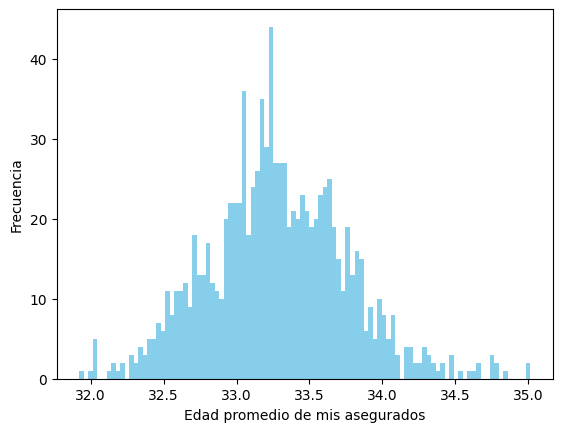

In [81]:
plt.hist(muestras_generadas.mean(axis=1), bins=100, color="skyblue")
plt.xlabel("Edad promedio de mis asegurados")
plt.ylabel("Frecuencia")
plt.show()

In [82]:
#Intervalo de confianza

int_confianza =np.quantile(muestras_generadas.mean(axis=1), [0.025, 0.975])

In [83]:
int_confianza

array([32.393325, 34.301025])

In [84]:
promedios_muestras = muestras_generadas.mean(axis=1)
media = promedios_muestras.mean()
media

np.float64(33.279323999999995)

In [85]:
q_025 = np.quantile(promedios_muestras, 0.025)
q_025

np.float64(32.393325)

In [86]:
q_975 = np.quantile(promedios_muestras, 0.975)
q_975

np.float64(34.30102500000001)

In [87]:
media_inicial = muestra.mean()
media_inicial

np.float64(34.218)

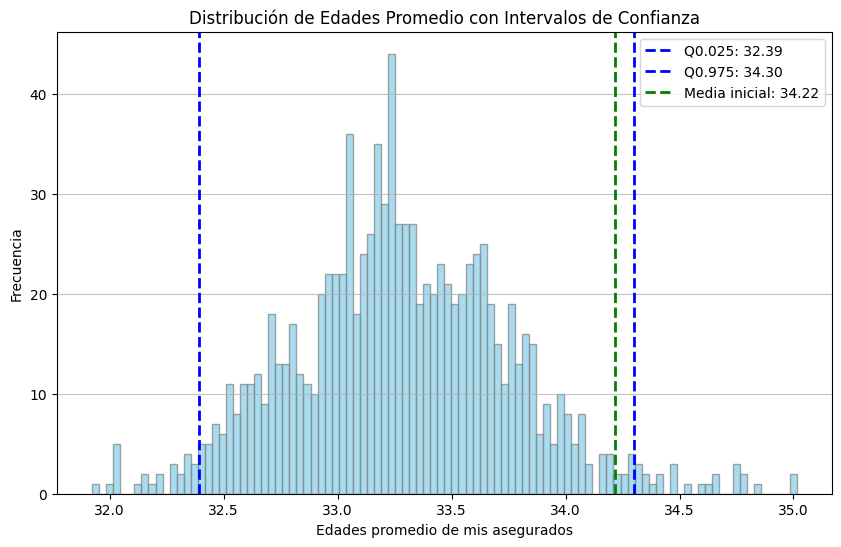

In [88]:
# Crear el histograma y agregar las líneas de los cuantiles y la media
plt.figure(figsize=(10, 6))
plt.hist(promedios_muestras, bins=100, color="skyblue", edgecolor='gray', alpha=0.7)
# plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(q_025, color='blue', linestyle='--', linewidth=2, label=f'Q0.025: {q_025:.2f}')
plt.axvline(q_975, color='blue', linestyle='--', linewidth=2, label=f'Q0.975: {q_975:.2f}')
plt.axvline(media_inicial, color='green', linestyle='--', linewidth=2, label=f'Media inicial: {media_inicial:.2f}')

# Añadir etiquetas y leyenda
plt.xlabel("Edades promedio de mis asegurados")
plt.ylabel("Frecuencia")
plt.title("Distribución de Edades Promedio con Intervalos de Confianza")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()


#Ejercicio Bitcoin

In [89]:
from datetime import datetime

now = datetime.now()
dt_string = now.strftime("%d/%m/%Y")

In [90]:
import yfinance as yf
import pandas as pd
import numpy as np

In [91]:
Ticker = "BTC-USD"
Start_Date = "2023-10-18"
End_Date  = "2024-10-18"
data = yf.download(Ticker, Start_Date, End_Date)

[*********************100%***********************]  1 of 1 completed


In [92]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2023-10-18,28328.341797,28889.009766,28174.251953,28413.531250,12724128586
2023-10-19,28719.806641,28892.474609,28177.988281,28332.416016,14448058195
2023-10-20,29682.949219,30104.085938,28601.669922,28732.812500,21536125230
2023-10-21,29918.412109,30287.482422,29481.751953,29683.380859,11541146996
2023-10-22,29993.896484,30199.433594,29720.312500,29918.654297,10446520040


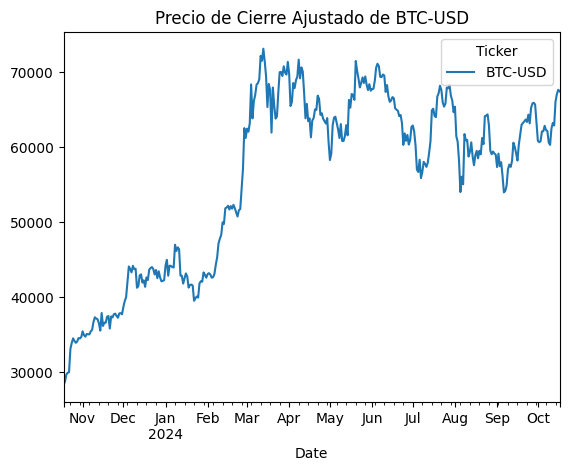

In [93]:
data['Close'].plot(title=f"Precio de Cierre Ajustado de {Ticker}")
plt.show()

In [94]:
datos = pd.DataFrame(data['Close'])
datos

Ticker,BTC-USD
Date,
2023-10-18,28328.341797
2023-10-19,28719.806641
2023-10-20,29682.949219
2023-10-21,29918.412109
2023-10-22,29993.896484
...,...
2024-10-13,62851.375000
2024-10-14,66046.125000
2024-10-15,67041.109375


In [95]:
datos.columns

Index(['BTC-USD'], dtype='object', name='Ticker')

In [96]:
datos['Log_Return'] = np.log(datos['BTC-USD'] / datos['BTC-USD'].shift(-1))
datos

Ticker,BTC-USD,Log_Return
Date,,
2023-10-18,28328.341797,-0.013724
2023-10-19,28719.806641,-0.032986
2023-10-20,29682.949219,-0.007901
2023-10-21,29918.412109,-0.002520
2023-10-22,29993.896484,-0.098123
...,...,...
2024-10-13,62851.375000,-0.049581
2024-10-14,66046.125000,-0.014953
2024-10-15,67041.109375,-0.008490


In [97]:
datos_invertidos = datos[::-1].fillna(0)
datos_invertidos

Ticker,BTC-USD,Log_Return
Date,,
2024-10-17,67399.835938,0.000000
2024-10-16,67612.718750,0.003154
2024-10-15,67041.109375,-0.008490
2024-10-14,66046.125000,-0.014953
2024-10-13,62851.375000,-0.049581
...,...,...
2023-10-22,29993.896484,-0.098123
2023-10-21,29918.412109,-0.002520
2023-10-20,29682.949219,-0.007901


In [98]:
# Muestra
import random
#tamano_muestra = random.randint(1, 365)
tamano_muestra = 100
muestra = datos_invertidos['Log_Return'].head(tamano_muestra)
muestra

,Log_Return
Date,
2024-10-17,0.000000
2024-10-16,0.003154
2024-10-15,-0.008490
2024-10-14,-0.014953
2024-10-13,-0.049581
...,...
2024-07-14,-0.064999
2024-07-13,-0.025928
2024-07-12,-0.022753


In [99]:
muestras_generadas = np.array([])
num_muestras = 1000
for i in range(num_muestras):
    muestras_generadas = np.append(muestras_generadas, np.random.choice(muestra, tamano_muestra, replace = True))

muestras_generadas = muestras_generadas.reshape(-1, tamano_muestra)
muestras_generadas

array([[ 0.02284251,  0.02284251, -0.02092454, ..., -0.05966668,
        -0.04958055, -0.02592785],
       [ 0.02284251, -0.00930963,  0.00690925, ...,  0.06221701,
         0.01818596, -0.0116727 ],
       [-0.03193999, -0.03176403, -0.02092454, ...,  0.00336253,
        -0.02592785, -0.03176403],
       ...,
       [-0.00936755,  0.00838777, -0.00349313, ...,  0.02885744,
        -0.00936755,  0.02828177],
       [-0.02291143,  0.0313783 ,  0.00168357, ..., -0.00849011,
         0.03173873,  0.02418345],
       [ 0.00542109, -0.03176403, -0.01495264, ...,  0.04017886,
        -0.00131963, -0.00147305]])

In [100]:
# Seleccionar 4 índices aleatorios entre 0 y 999
indices_aleatorios = np.random.choice(muestras_generadas.shape[0], size=4, replace=False)

# Obtener las 4 filas aleatorias
filas_aleatorias  = muestras_generadas[indices_aleatorios]
filas_aleatorias

array([[ 0.00931261, -0.00617761, -0.03193999,  0.0014548 , -0.00962398,
        -0.02291143, -0.04119072,  0.02024486,  0.03173873, -0.04119072,
        -0.00208609,  0.00690925,  0.00336253,  0.00931261,  0.01687495,
         0.00931261,  0.0084622 ,  0.0248315 , -0.03598749, -0.02092454,
         0.0248315 , -0.03894551, -0.01135985, -0.01495264,  0.01813195,
        -0.02130028,  0.00383726, -0.02291143, -0.0031893 , -0.01495264,
         0.04015297, -0.03193999,  0.02024486, -0.00208609, -0.04119072,
        -0.00936755,  0.00804021,  0.        , -0.00617761, -0.0039966 ,
        -0.02592785, -0.03193999, -0.000362  , -0.02092454,  0.0014548 ,
        -0.00131963, -0.000362  ,  0.04017886,  0.00838777, -0.01495264,
         0.06221701, -0.02072112,  0.01354163,  0.00315353, -0.00936755,
        -0.02592785,  0.00502307, -0.00849011, -0.06499862,  0.01687024,
         0.01687024,  0.01813195, -0.02291143, -0.00617761, -0.03571709,
        -0.0119063 ,  0.00502307,  0.02885744,  0.0

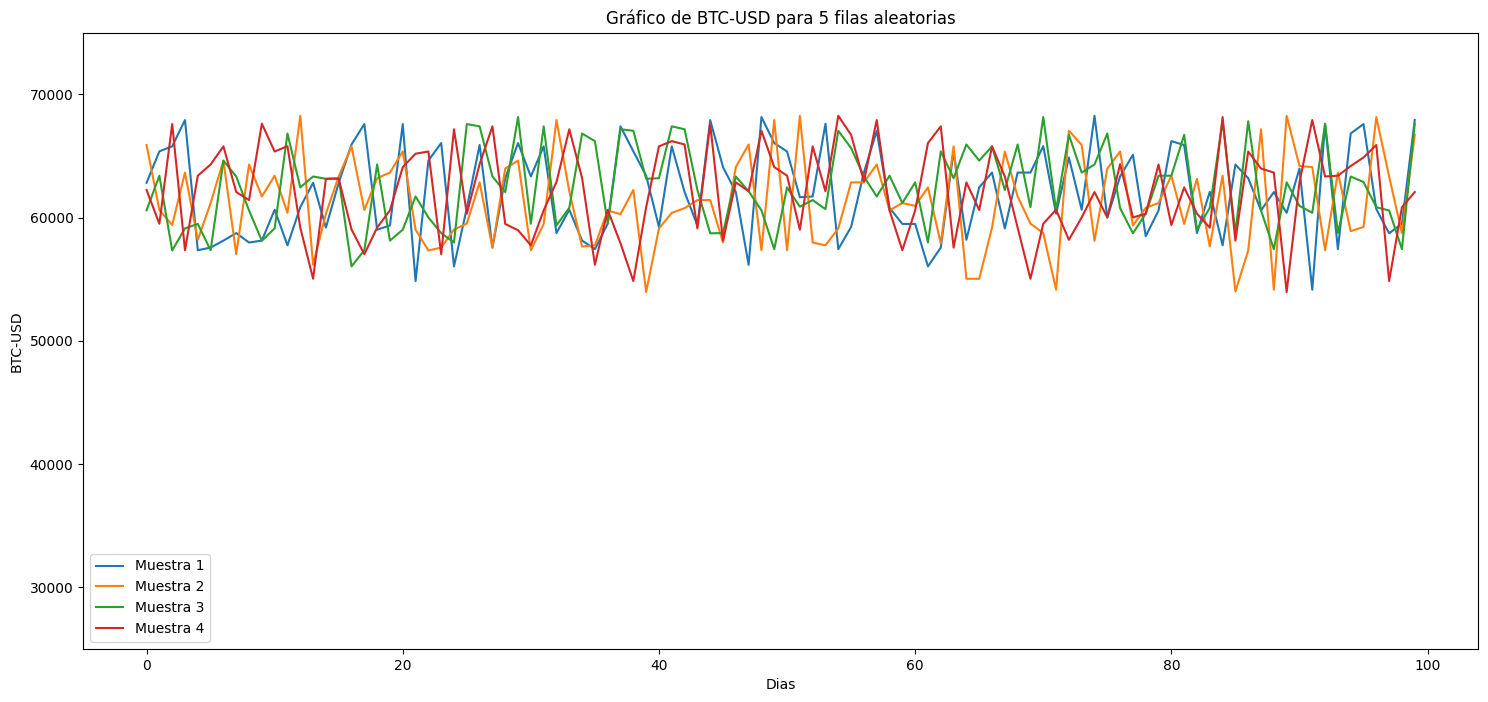

In [101]:
# Configurar el gráfico
plt.figure(figsize=(18, 8))

# Iterar sobre las filas aleatorias y graficarlas
for i in range(4):
    # Crear el DataFrame para la fila aleatoria
    tabla = pd.DataFrame(filas_aleatorias[i], columns=['Log_Return'])

    # Realizar el merge con datos_invertidos
    resultado = pd.merge(tabla, datos_invertidos, left_on='Log_Return', right_on='Log_Return', how='left')

    # Graficar la serie 'BTC-USD' resultante con un color diferente
    plt.plot(resultado['BTC-USD'], label=f'Muestra {i+1}')  # Etiqueta cada línea con su índice

# Añadir título y leyenda
plt.ylim(25000, 75000)
plt.title('Gráfico de BTC-USD para 5 filas aleatorias')
plt.xlabel('Dias')
plt.ylabel('BTC-USD')
plt.legend()
plt.show()

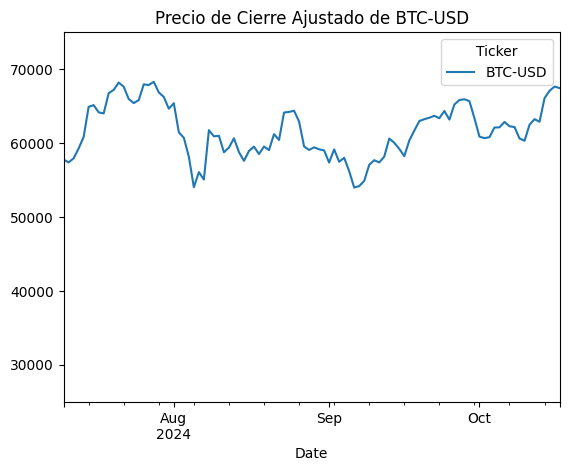

In [102]:
# Graficar solo los últimos 100 datos de 'Adj Close'
data['Close'].iloc[-100:].plot(title=f"Precio de Cierre Ajustado de {Ticker}")

# Mostrar el gráfico
plt.ylim(25000, 75000)
plt.show()

#Ejercicio NVDA

[*********************100%***********************]  1 of 1 completed


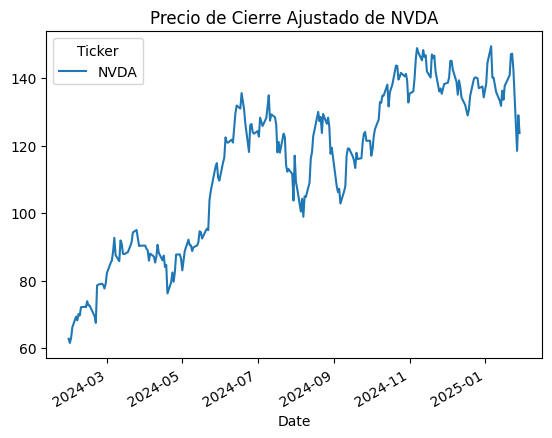

In [103]:
Ticker = "NVDA"
Start_Date = "2024-01-30"
End_Date  = "2025-01-30"
data = yf.download(Ticker, Start_Date, End_Date)
data.head()
data['Close'].plot(title=f"Precio de Cierre Ajustado de {Ticker}")
plt.show()


In [104]:
datos = pd.DataFrame(data['Close'])
datos


Ticker,NVDA
Date,
2024-01-30,62.750431
2024-01-31,61.503902
2024-02-01,63.003342
2024-02-02,66.135170
2024-02-05,69.305977
...,...
2025-01-23,147.206467
2025-01-24,142.606873
2025-01-27,118.409103


In [105]:
datos.columns
datos['Log_Return'] = np.log(datos['NVDA'] / datos['NVDA'].shift(-1))
datos
datos_invertidos = datos[::-1].fillna(0)
datos_invertidos


Ticker,NVDA,Log_Return
Date,,
2025-01-29,123.688622,0.000000
2025-01-28,128.978149,0.041876
2025-01-27,118.409103,-0.085497
2025-01-24,142.606873,0.185946
2025-01-23,147.206467,0.031744
...,...,...
2024-02-05,69.305977,0.016125
2024-02-02,66.135170,-0.046830
2024-02-01,63.003342,-0.048513


In [106]:
# Muestra
import random
#tamano_muestra = random.randint(1, 365)
tamano_muestra = 100
muestra = datos_invertidos['Log_Return'].head(tamano_muestra)
muestra
muestras_generadas = np.array([])
num_muestras = 1000
for i in range(num_muestras):
    muestras_generadas = np.append(muestras_generadas, np.random.choice(muestra, tamano_muestra, replace = True))

muestras_generadas = muestras_generadas.reshape(-1, tamano_muestra)
muestras_generadas


array([[-0.03623242, -0.03892557,  0.04187571, ...,  0.01599218,
        -0.0189804 , -0.02064456],
       [-0.00778381, -0.02064456, -0.02216686, ...,  0.00843159,
         0.00083536, -0.00778381],
       [-0.01519342, -0.04357437,  0.1859461 , ..., -0.03478615,
        -0.03343603,  0.02151319],
       ...,
       [ 0.03724638, -0.0027448 ,  0.00048243, ...,  0.04799381,
        -0.00659489,  0.04837395],
       [ 0.01822664,  0.01297297, -0.01670941, ...,  0.02354956,
        -0.02216686,  0.01371544],
       [ 0.01979235,  0.00843159,  0.01227193, ...,  0.0227558 ,
         0.03271037, -0.02127361]])

In [107]:
# Seleccionar 4 índices aleatorios entre 0 y 999
indices_aleatorios = np.random.choice(muestras_generadas.shape[0], size=4, replace=False)

# Obtener las 4 filas aleatorias
filas_aleatorias  = muestras_generadas[indices_aleatorios]
filas_aleatorias

array([[ 2.07035374e-03,  2.13996633e-04,  1.59921824e-02,
         7.64764540e-03,  1.22719338e-02, -4.35743723e-02,
        -2.39686869e-02,  3.31123270e-02, -3.49733959e-03,
        -1.16893846e-02,  0.00000000e+00, -2.22088746e-02,
        -3.93017663e-03, -3.88864787e-02, -3.96813369e-02,
        -2.16065728e-02,  4.79938118e-02, -1.67094093e-02,
         1.29729706e-02, -1.01935122e-03, -1.01935122e-03,
        -1.16893846e-02,  4.82432225e-04, -2.94958481e-02,
         1.37154401e-02, -3.34360322e-02, -3.62324191e-02,
        -1.36369771e-02,  4.26728444e-02,  2.84674427e-02,
        -3.08268187e-02,  1.10948655e-02, -3.49733959e-03,
         1.80774019e-03,  7.40391971e-05, -2.21668620e-02,
        -3.37561149e-02, -1.89804005e-02,  1.22719338e-02,
        -3.47861497e-02,  7.64764540e-03, -3.34360322e-02,
         3.72463750e-02,  1.36144214e-02, -2.24034076e-02,
        -2.24034076e-02,  3.17444351e-02,  2.84674427e-02,
        -3.47861497e-02,  1.14154306e-02, -2.79768629e-0

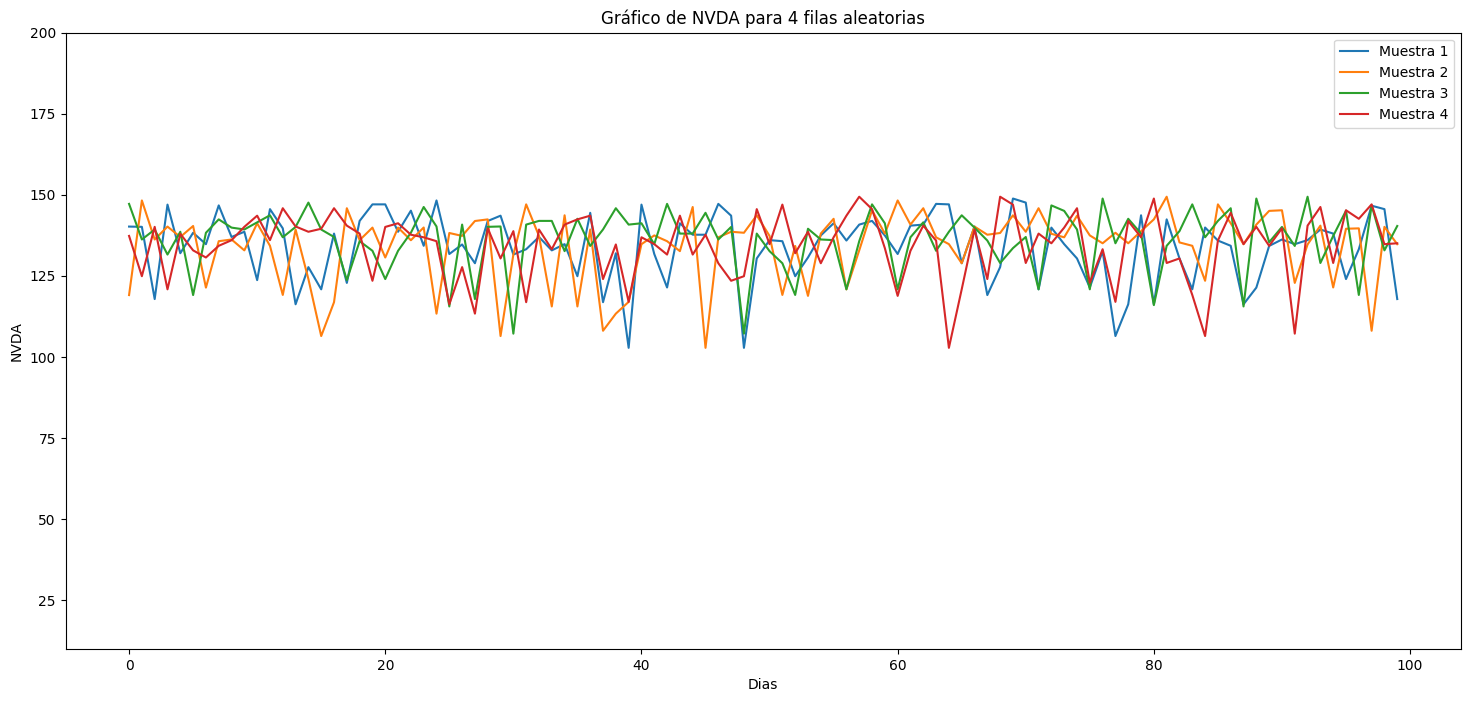

In [108]:
# Configurar el gráfico
plt.figure(figsize=(18, 8))

# Iterar sobre las filas aleatorias y graficarlas
for i in range(4):
    # Crear el DataFrame para la fila aleatoria
    tabla = pd.DataFrame(filas_aleatorias[i], columns=['Log_Return'])

    # Realizar el merge con datos_invertidos
    resultado = pd.merge(tabla, datos_invertidos, left_on='Log_Return', right_on='Log_Return', how='left')

    # Graficar la serie 'NVDA' resultante con un color diferente
    plt.plot(resultado['NVDA'], label=f'Muestra {i+1}')  # Etiqueta cada línea con su índice

# Añadir título y leyenda
plt.ylim(10, 200)
plt.title('Gráfico de NVDA para 4 filas aleatorias')
plt.xlabel('Dias')
plt.ylabel('NVDA')
plt.legend()
plt.show()

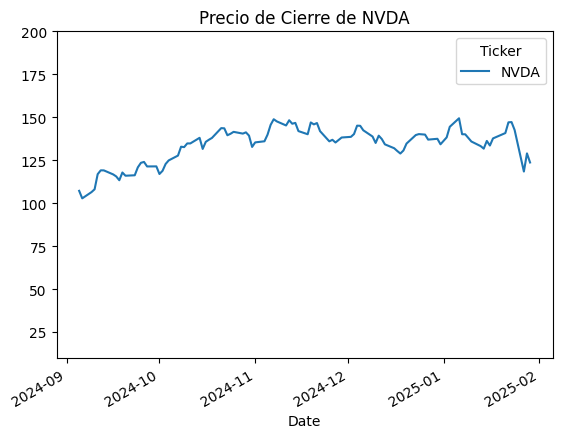

In [109]:
# Graficar solo los últimos 100 datos de 'Close'
data['Close'].iloc[-100:].plot(title=f"Precio de Cierre de {Ticker}")

# Mostrar el gráfico
plt.ylim(10, 200)
plt.show()

##Montecarlo con los datos aleatorios

<ipython-input-113-7fbff3cbf83e>:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  montecarlo_results[f'sim_{i}'] = pd.Series(simulation)
<ipython-input-113-7fbff3cbf83e>:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  montecarlo_results[f'sim_{i}'] = pd.Series(simulation)
<ipython-input-113-7fbff3cbf83e>:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

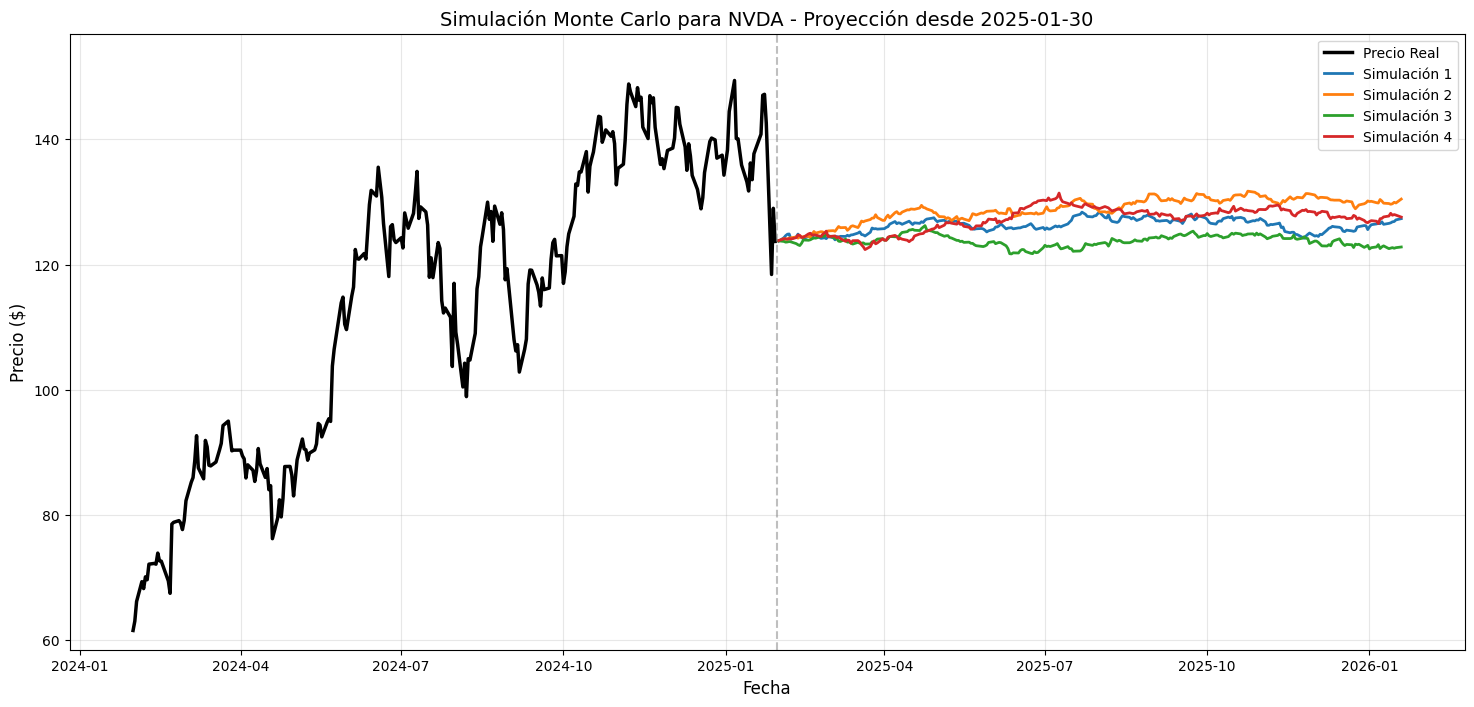

Mu ajustado (retorno diario promedio): 0.002998
Sigma (volatilidad diaria): 0.035951
Precio inicial de simulación: 123.69
Mínimo precio histórico: 61.50
Máximo precio histórico: 149.42


In [113]:
datos = pd.DataFrame(data['Close'])
datos.columns = ['NVDA']
datos['Log_Return'] = np.log(datos['NVDA'] / datos['NVDA'].shift(1))
datos = datos.dropna()

N = len(datos) - 1
mu = datos['Log_Return'].sum() / N
sigma = np.sqrt(np.sum((datos['Log_Return'] - mu)**2) / (N - 1))


if mu < 0:
    mu = abs(datos['Log_Return'].mean()) * 0.5
else:
    mu = mu * 1.1


def MGB_acciones(mu, sigma, starting_price, steps, min_drop=-0.5):
    dt = 1/252
    s0 = starting_price
    et_vector = np.random.normal(loc=0, scale=1, size=steps)
    exp_vector = np.exp((mu - (sigma**2) / 2) * dt + sigma * et_vector * np.sqrt(dt))

    st_1 = [s0]
    for i in range(steps):
        s = st_1[i] * exp_vector[i]
        if s < st_1[i] * (1 + min_drop):
            s = st_1[i] * (1 + min_drop)
        st_1.append(s)
    return st_1[1:]


num_simulations = 500
steps = 252
starting_price = datos['NVDA'].iloc[-1]
montecarlo_results = pd.DataFrame()

for i in range(num_simulations):
    simulation = MGB_acciones(mu, sigma, starting_price, steps)
    montecarlo_results[f'sim_{i}'] = pd.Series(simulation)


np.random.seed(42)
random_indices = np.random.choice(num_simulations, size=4, replace=False)
random_simulations = montecarlo_results.iloc[:, random_indices]


historical_dates = datos.index
projection_dates = pd.date_range(start=End_Date, periods=steps + 1, freq='B')[1:]
all_dates = pd.concat([pd.Series(historical_dates), pd.Series(projection_dates)])


plt.figure(figsize=(18, 8))


plt.plot(historical_dates,
         datos['NVDA'],
         color='black',
         linewidth=2.5,
         label='Precio Real')


for i in range(4):
    simulation_data = pd.concat([
        pd.Series([starting_price]),
        random_simulations.iloc[:, i]
    ])
    plt.plot(projection_dates,
             random_simulations.iloc[:, i],
             linewidth=2,
             label=f'Simulación {i+1}')


plt.axvline(x=pd.to_datetime(End_Date),
            color='gray',
            linestyle='--',
            alpha=0.5)
plt.title(f"Simulación Monte Carlo para {Ticker} - Proyección desde {End_Date}", fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)


all_values = pd.concat([datos['NVDA'], random_simulations.stack()])
plt.ylim(all_values.min() * 0.95, all_values.max() * 1.05)

plt.show()

print(f"Mu ajustado (retorno diario promedio): {mu:.6f}")
print(f"Sigma (volatilidad diaria): {sigma:.6f}")
print(f"Precio inicial de simulación: {starting_price:.2f}")
print(f"Mínimo precio histórico: {datos['NVDA'].min():.2f}")
print(f"Máximo precio histórico: {datos['NVDA'].max():.2f}")